# Explore here

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Step 2: Exploration and Data Cleaning

In [98]:
# Obtain dimensions of dataframe
# (# rows, # coluns
total_data.shape

(41188, 21)

#total_data.columns

In [99]:
total_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [100]:
total_data.iloc[1]

age                        57
job                  services
marital               married
education         high.school
default               unknown
housing                    no
loan                       no
contact             telephone
month                     may
day_of_week               mon
duration                  149
campaign                    1
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate              1.1
cons.price.idx         93.994
cons.conf.idx           -36.4
euribor3m               4.857
nr.employed            5191.0
y                          no
Name: 1, dtype: object

In [101]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [102]:
total_data.isnull().sum(axis=0)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [103]:
missing_proportion = round(total_data.isnull().sum(axis=0) / len(total_data), 4)

print("Proportion of missing values for each column:")
print(missing_proportion)

Proportion of missing values for each column:
age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64


Eliminate Duplicates

In [104]:
print(f"Dimensions before dropping duplicates: {total_data.shape}")

total_data = total_data.drop_duplicates()

print(f"Dimensions after dropping duplicates: {total_data.shape}")

Dimensions before dropping duplicates: (41188, 21)
Dimensions after dropping duplicates: (41176, 21)


In [105]:
#Eliminate Irrelevant Information
columns_to_remove = ["id", "contact", "month", "campaign", "pdays", "poutcome", "emp.var.rate"]

for column in columns_to_remove:
    try:
        total_data = total_data.drop(column, axis=1)
    except:
        print(f"Column {column} was already removed.")

total_data.head(5)

Column id was already removed.


,age,job,marital,education,default,housing,loan,day_of_week,duration,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,mon,261,0,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,mon,149,0,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,mon,226,0,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,mon,151,0,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,mon,307,0,93.994,-36.4,4.857,5191.0,no


In [106]:
#missing values

missing_proportion = round(total_data.isnull().sum(axis=0) / len(total_data), 4)

print("Proportion of missing values for each column:")
print(missing_proportion)

Proportion of missing values for each column:
age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
day_of_week       0.0
duration          0.0
previous          0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64


In [107]:
total_data['marital'].value_counts(normalize=True)

marital
married     0.605231
single      0.280843
divorced    0.111983
unknown     0.001943
Name: proportion, dtype: float64

Total loan status of yes and no

In [108]:
total_data['loan'].value_counts()

loan
no         33938
yes         6248
unknown      990
Name: count, dtype: int64

The number of university degress vs non university degree

In [109]:
total_data['education'].value_counts()

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

Age count for each participant

In [110]:
total_data['age'].value_counts()

age
31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64

Basic descriptive

In [111]:
total_data.describe()

,age,duration,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,0.173013,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,0.494964,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,0.000000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,0.000000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,0.000000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,0.000000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,7.000000,94.767000,-26.900000,5.045000,5228.100000


In [112]:
total_data.duplicated()#.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41176, dtype: bool

total_data.drop("PassengerId", axis = 1)#.duplicated().sum()

In [113]:
total_data.drop("nr.employed", axis = 1)#.duplicated().sum()

,age,job,marital,education,default,housing,loan,day_of_week,duration,previous,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,mon,261,0,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,mon,149,0,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,mon,226,0,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,mon,151,0,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,mon,307,0,93.994,-36.4,4.857,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,fri,334,0,94.767,-50.8,1.028,yes
41184,46,blue-collar,married,professional.course,no,no,no,fri,383,0,94.767,-50.8,1.028,no
41185,56,retired,married,university.degree,no,yes,no,fri,189,0,94.767,-50.8,1.028,no
41186,44,technician,married,professional.course,no,no,no,fri,442,0,94.767,-50.8,1.028,yes


In [114]:
total_data[['job', 'y']]

,job,y
0,housemaid,no
1,services,no
2,services,no
3,admin.,no
4,services,no
...,...,...
41183,retired,yes
41184,blue-collar,no
41185,retired,no
41186,technician,yes


In [115]:
total_data[['marital', 'education']]

,marital,education
0,married,basic.4y
1,married,high.school
2,married,high.school
3,married,basic.6y
4,married,high.school
...,...,...
41183,married,professional.course
41184,married,professional.course
41185,married,university.degree
41186,married,professional.course


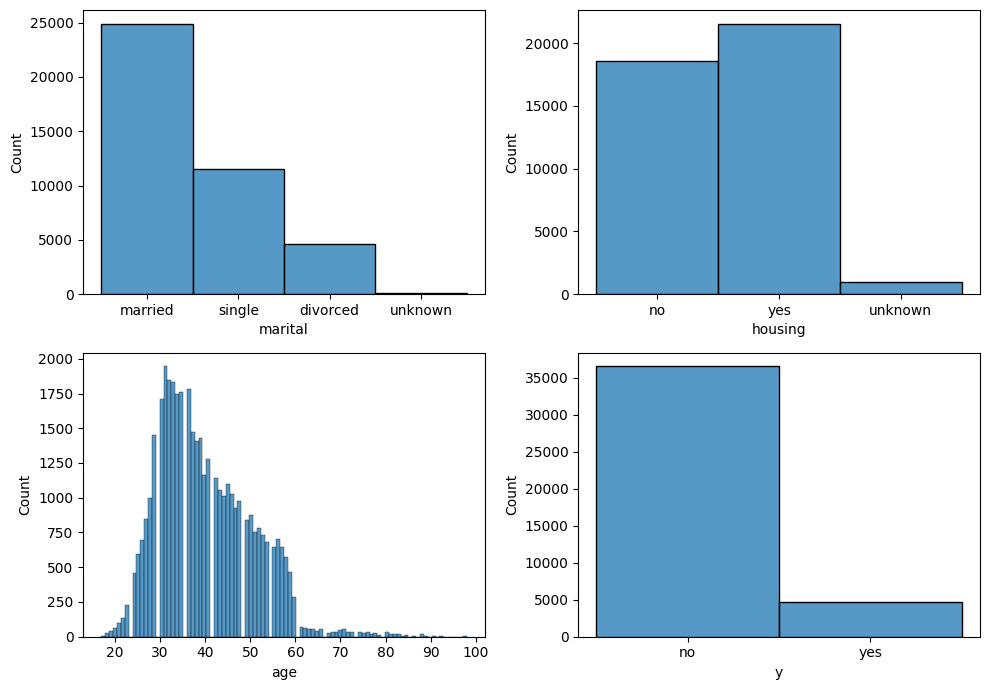

In [116]:
categorical_features = ['marital', 'age', 'housing', 'y']

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = total_data, x = "marital")
sns.histplot(ax = axis[1, 0], data = total_data, x = "age")
sns.histplot(ax = axis[0, 1], data = total_data, x = "housing")
sns.histplot(ax = axis[1, 1], data = total_data, x = "y")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

ValueError: Could not interpret value `pdays` for `x`. An entry with this name does not appear in `data`.

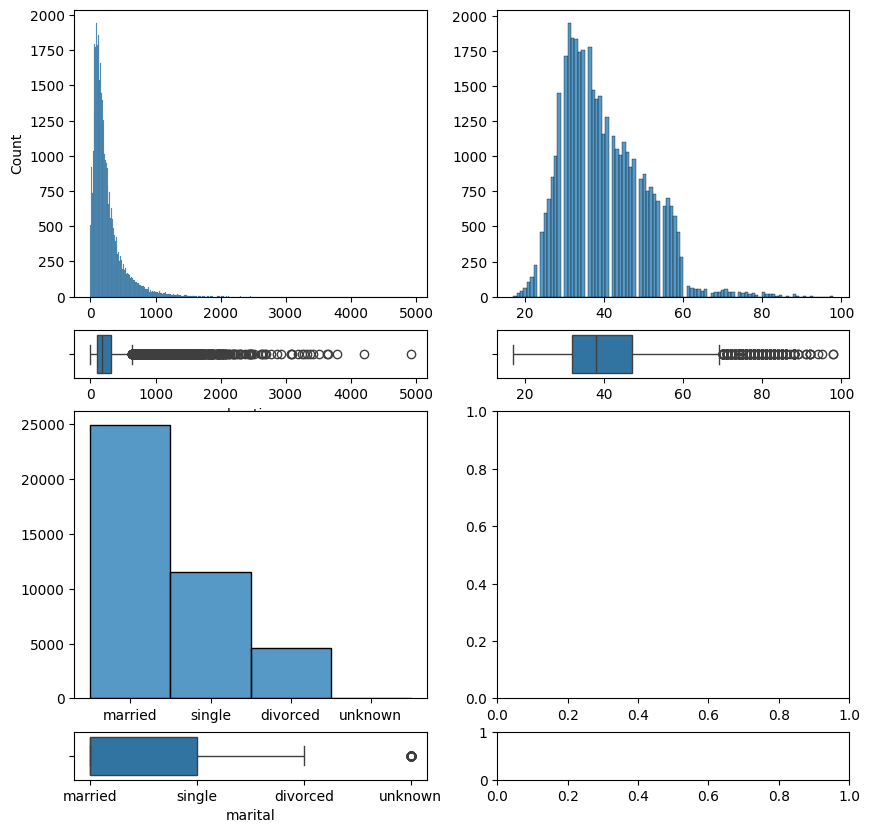

In [117]:
numerical_features = ['age', 'marital', 'housing', 'duration']

fig, axis = plt.subplots(4, 2, figsize = (10, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = total_data, x = "duration").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "duration")
sns.histplot(ax = axis[0, 1], data = total_data, x = "age").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "age")

sns.histplot(ax = axis[2, 0], data = total_data, x = "marital").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "marital")
sns.histplot(ax = axis[2, 1], data = total_data, x = "pdays").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "pdays")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

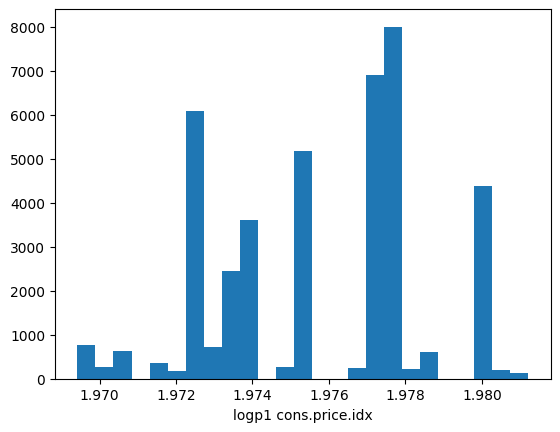

In [ ]:
import numpy as np
plt.hist(np.log10(total_data['cons.price.idx']+1), bins=25)
plt.xlabel('logp1 cons.price.idx')
plt.show()

In [ ]:
numerical_features

['age', 'marital', 'housing', 'duration']

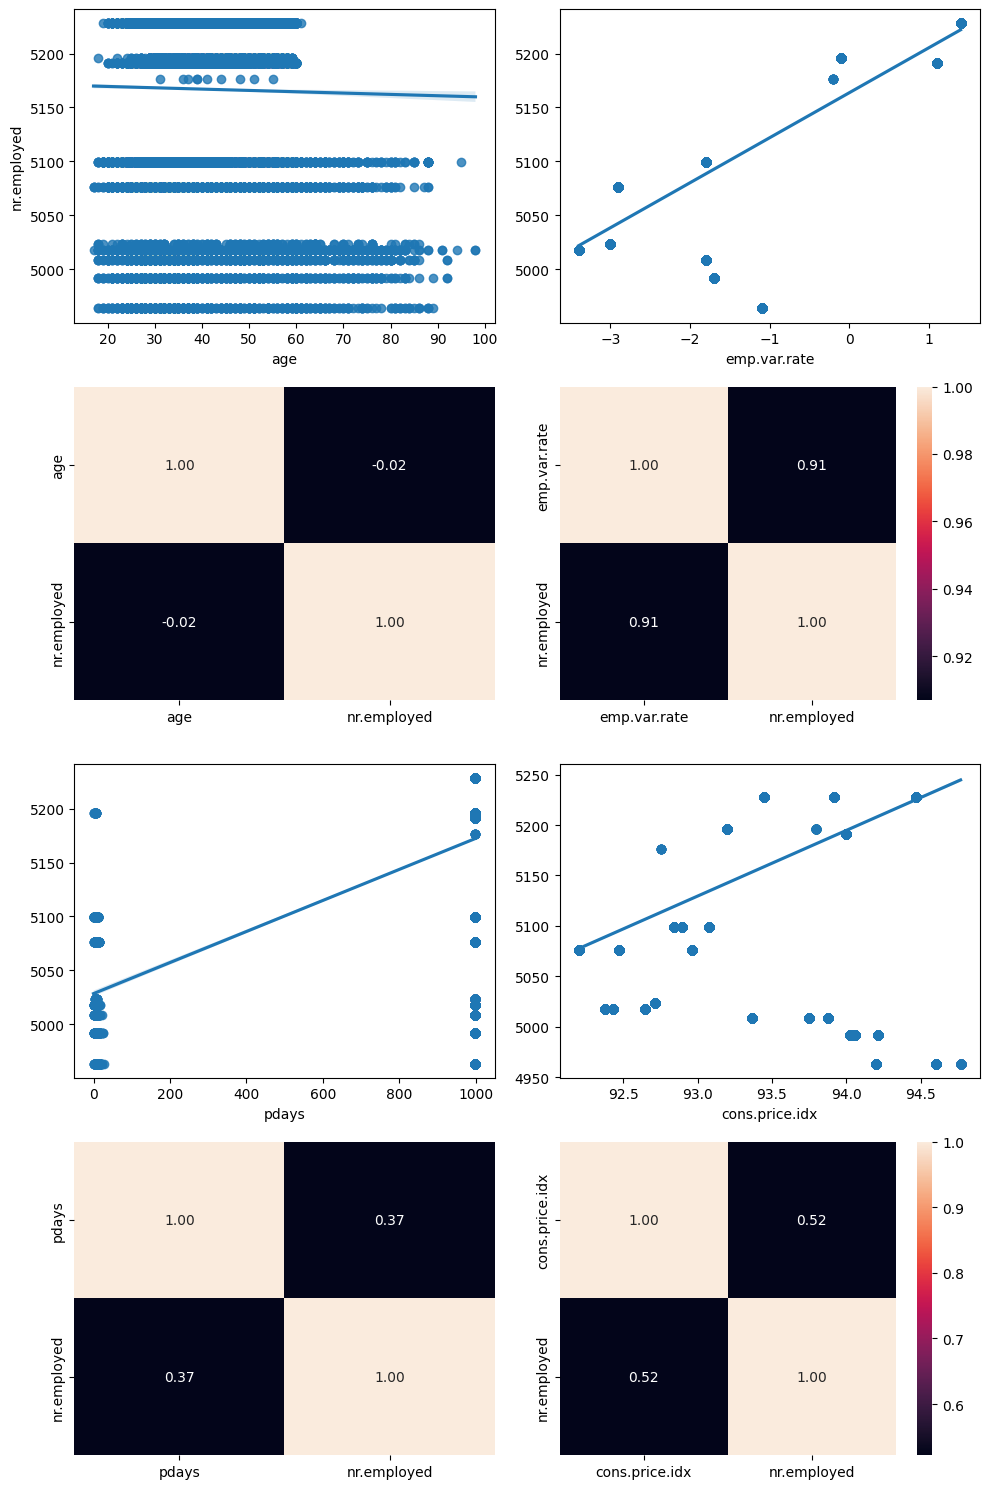

In [ ]:
fig, axis = plt.subplots(4, 2, figsize = (10, 15))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "age", y = "nr.employed")
sns.heatmap(total_data[["age", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "emp.var.rate", y = "nr.employed").set(ylabel=None)
sns.heatmap(total_data[["emp.var.rate", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "pdays", y = "nr.employed").set(ylabel=None)
sns.heatmap(total_data[["pdays", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar=False)

sns.regplot(ax = axis[2, 1], data = total_data, x = "cons.price.idx", y = "nr.employed").set(ylabel=None)
sns.heatmap(total_data[["cons.price.idx", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])



# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

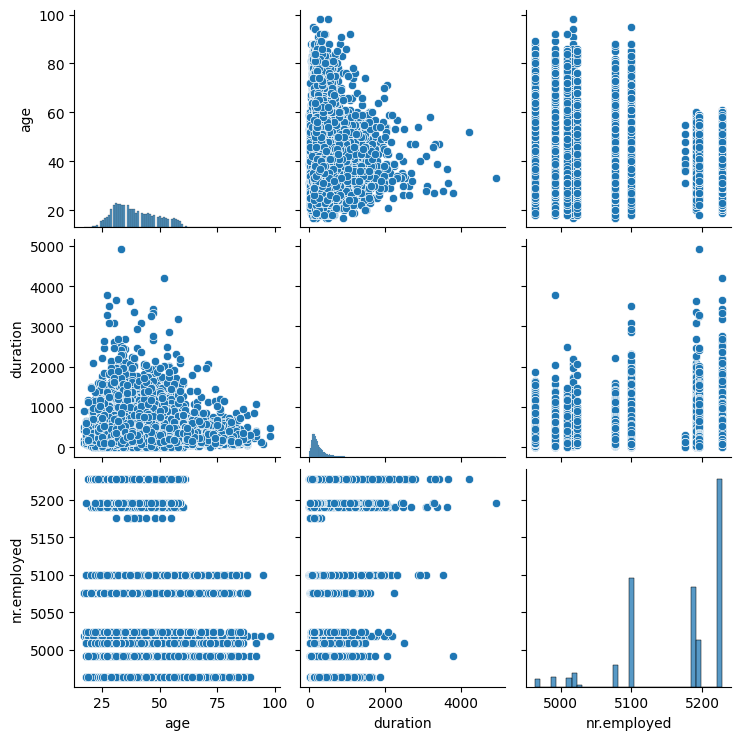

In [ ]:
sns.pairplot(data = total_data[numerical_features + ['nr.employed']])

In [ ]:
categorical_features

['marital', 'age', 'housing', 'y']

Analysis of Multivariate Variables

In [ ]:
# dataset has seven categorical columns:job, marital, education, default, housing, loan, & days of week
total_data.head()

,age,job,marital,education,default,housing,loan,day_of_week,duration,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,mon,261,0,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,mon,149,0,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,mon,226,0,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,mon,151,0,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,mon,307,0,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Making seven columns that are the numeric representation of the original categorical column
total_data['job_n'] = pd.factorize(total_data['job'])[0]
total_data['marital_n'] = pd.factorize(total_data['marital'])[0]
total_data['education_n'] = pd.factorize(total_data['education'])[0]
total_data['default_n'] = pd.factorize(total_data['default'])[0]
total_data['housing_n'] = pd.factorize(total_data['housing'])[0]
total_data['loan_n'] = pd.factorize(total_data['loan'])[0]
total_data['day_of_week_n'] = pd.factorize(total_data['day_of_week'])[0]

total_data.head()

,age,job,marital,education,default,housing,loan,day_of_week,duration,previous,...,euribor3m,nr.employed,y,job_n,marital_n,education_n,default_n,housing_n,loan_n,day_of_week_n
0,56,housemaid,married,basic.4y,no,no,no,mon,261,0,...,4.857,5191.0,no,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,mon,149,0,...,4.857,5191.0,no,1,0,1,1,0,0,0
2,37,services,married,high.school,no,yes,no,mon,226,0,...,4.857,5191.0,no,1,0,1,0,1,0,0
3,40,admin.,married,basic.6y,no,no,no,mon,151,0,...,4.857,5191.0,no,2,0,2,0,0,0,0
4,56,services,married,high.school,no,no,yes,mon,307,0,...,4.857,5191.0,no,1,0,1,0,0,1,0


In [ ]:
# Drop the original categorical columns
total_data = total_data.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'day_of_week'], axis=1)
total_data.head()

,age,duration,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_n,marital_n,education_n,default_n,housing_n,loan_n,day_of_week_n
0,56,261,0,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0
1,57,149,0,93.994,-36.4,4.857,5191.0,no,1,0,1,1,0,0,0
2,37,226,0,93.994,-36.4,4.857,5191.0,no,1,0,1,0,1,0,0
3,40,151,0,93.994,-36.4,4.857,5191.0,no,2,0,2,0,0,0,0
4,56,307,0,93.994,-36.4,4.857,5191.0,no,1,0,1,0,0,1,0


Feature Engineering and Training and Testing Data

In [ ]:
# X represents all features excluding the target
X = total_data[['age', 'duration', 'job_n', 'housing_n', 'marital_n', 'education_n', 'default_n', 'nr.employed']] # A dataframe (double brackets)

# y contains our target feature
y = total_data['y'] # A series (single brackets)

In [ ]:
X.head()

,age,duration,job_n,housing_n,marital_n,education_n,default_n,nr.employed
0,56,261,0,0,0,0,0,5191.0
1,57,149,1,0,0,1,1,5191.0
2,37,226,1,1,0,1,0,5191.0
3,40,151,2,0,0,2,0,5191.0
4,56,307,1,0,0,1,0,5191.0


In [ ]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41176, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
nrows, ncolumns = total_data.shape

print(f"Our entire dataset has {nrows} rows.")
print(f"Our training set should have 80% of our data so it should have {int(0.8*nrows)} rows.")
print(f"Our test set should have 20% of our data so it should have {int(0.2*nrows)} rows.")

Our entire dataset has 41176 rows.
Our training set should have 80% of our data so it should have 32940 rows.
Our test set should have 20% of our data so it should have 8235 rows.


In [ ]:
X_train

,age,duration,job_n,housing_n,marital_n,education_n,default_n,nr.employed
13485,40,123,3,1,0,0,1,5228.1
30811,33,399,2,0,1,1,0,5099.1
39015,32,87,11,1,0,1,0,5023.5
34153,34,143,3,1,0,2,0,5099.1
7999,33,71,3,1,1,3,1,5228.1
...,...,...,...,...,...,...,...,...
6314,55,591,5,1,0,1,0,5191.0
29921,32,259,1,0,0,1,0,5099.1
23962,35,93,6,1,0,6,0,5228.1
24557,40,99,4,1,1,3,1,5195.8


In [ ]:
y_train

13485     no
30811     no
39015     no
34153     no
7999      no
        ... 
6314      no
29921     no
23962     no
24557     no
30314    yes
Name: y, Length: 32940, dtype: object

In [ ]:
X_test

,age,duration,job_n,housing_n,marital_n,education_n,default_n,nr.employed
2701,35,188,1,0,0,1,0,5191.0
25149,49,163,2,0,0,6,0,5195.8
30100,53,167,2,1,1,1,0,5099.1
26303,29,93,4,1,1,6,0,5195.8
8920,31,185,2,0,0,1,1,5228.1
...,...,...,...,...,...,...,...,...
3586,28,207,1,1,1,1,0,5191.0
7479,30,115,3,0,0,3,1,5191.0
32203,32,209,11,0,1,6,0,5099.1
12562,35,153,3,1,1,2,1,5228.1


In [ ]:
y_test

2701     no
25149    no
30100    no
26303    no
8920     no
         ..
3586     no
7479     no
32203    no
12562    no
27715    no
Name: y, Length: 8236, dtype: object

Outlier Analysis

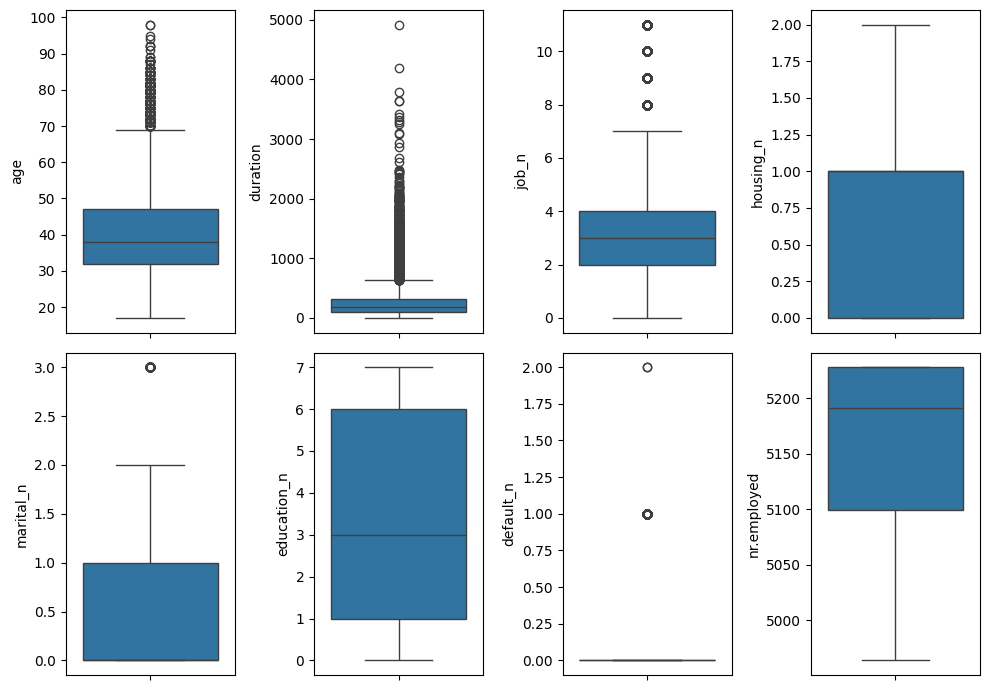

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(2, 4, figsize = (10, 7))

sns.boxplot(ax = axis[0, 0], data = X_train, y = "age")
sns.boxplot(ax = axis[0, 1], data = X_train, y = "duration")
sns.boxplot(ax = axis[0, 2], data = X_train, y = "job_n")
sns.boxplot(ax = axis[0, 3], data = X_train, y = "housing_n")
sns.boxplot(ax = axis[1, 0], data = X_train, y = "marital_n")
sns.boxplot(ax = axis[1, 1], data = X_train, y = "education_n")
sns.boxplot(ax = axis[1, 2], data = X_train, y = "default_n")
sns.boxplot(ax = axis[1, 3], data = X_train, y = "nr.employed")

plt.tight_layout()

plt.show()

In [ ]:
def replace_outliers(x_train, x_test):
    columns = x_train.columns

    # This loop will replace outliers for each column
    for column in columns:
        # Calculate Q_25 and Q_75 for the column using the data from the x_train set
        Q_25 = x_train[column].quantile(0.25)
        Q_75 = x_train[column].quantile(0.75)

        # Calculate the IQR
        IQR = Q_75 - Q_25

        # Calculate the upper and lower limit
        upper_limit = Q_75 + 1.5*IQR
        lower_limit = Q_25 - 1.5*IQR

        # Replace the outliers that are below the lower limit with the Q_25 value for both the training and test sets
        x_train.loc[x_train[column] < lower_limit, column] = Q_25
        x_test.loc[x_test[column] < lower_limit, column] = Q_25

        # Replace the outliers that are above the upper limit with the Q_75 value for both the training and test sets
        x_train.loc[x_train[column] > upper_limit, column] = Q_75
        x_test.loc[x_test[column] > upper_limit, column] = Q_75
    
    return x_train, x_test

In [ ]:
X_train, X_test = replace_outliers(X_train, X_test)

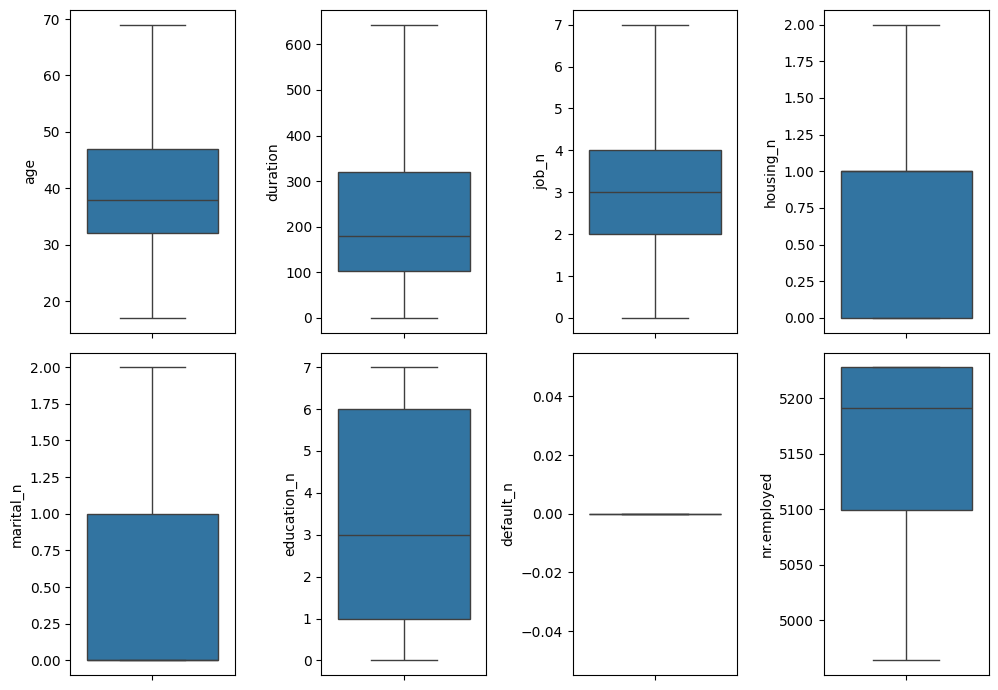

In [ ]:
fig, axis = plt.subplots(2, 4, figsize = (10, 7))

sns.boxplot(ax = axis[0, 0], data = X_train, y = "age")
sns.boxplot(ax = axis[0, 1], data = X_train, y = "duration")
sns.boxplot(ax = axis[0, 2], data = X_train, y = "job_n")
sns.boxplot(ax = axis[0, 3], data = X_train, y = "housing_n")
sns.boxplot(ax = axis[1, 0], data = X_train, y = "marital_n")
sns.boxplot(ax = axis[1, 1], data = X_train, y = "education_n")
sns.boxplot(ax = axis[1, 2], data = X_train, y = "default_n")
sns.boxplot(ax = axis[1, 3], data = X_train, y = "nr.employed")

plt.tight_layout()

plt.show()

#Missing Value Analysis

In [ ]:
print("Total missing values for each column in our X_train:")
print(X_train.isnull().sum(axis=0))

Total missing values for each column in our X_train:
age            0
duration       0
job_n          0
housing_n      0
marital_n      0
education_n    0
default_n      0
nr.employed    0
dtype: int64


In [ ]:
print("Total missing values for each column in our X_test:")
print(X_test.isnull().sum(axis=0))

Total missing values for each column in our X_test:
age            0
duration       0
job_n          0
housing_n      0
marital_n      0
education_n    0
default_n      0
nr.employed    0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

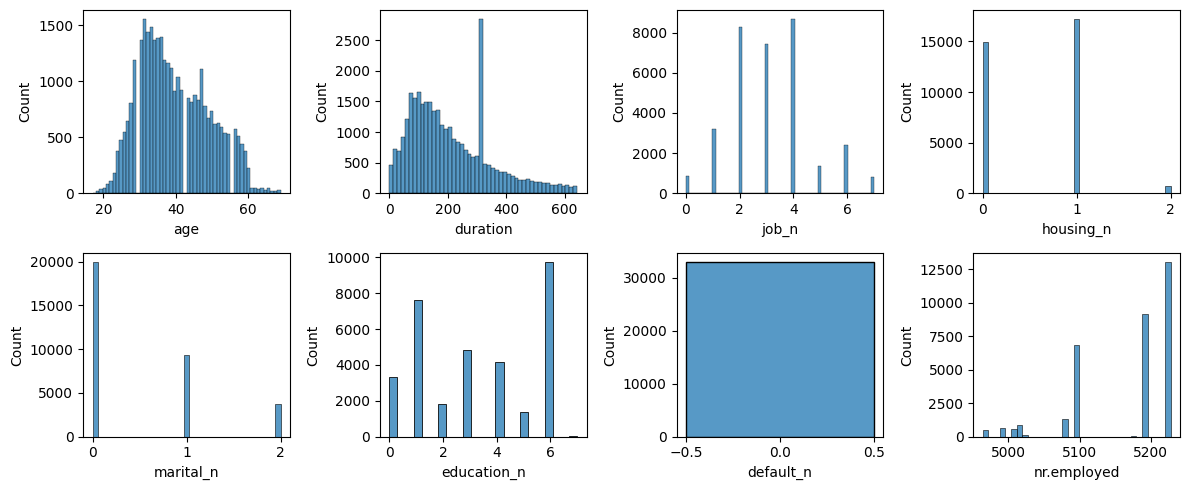

In [ ]:
fig, axis = plt.subplots(2, 4, figsize = (12, 5))

sns.histplot(ax = axis[0, 0], data = X_train, x = "age")
sns.histplot(ax = axis[0, 1], data = X_train, x = "duration")
sns.histplot(ax = axis[0, 2], data = X_train, x = "job_n")
sns.histplot(ax = axis[0, 3], data = X_train, x = "housing_n")
sns.histplot(ax = axis[1, 0], data = X_train, x = "marital_n")
sns.histplot(ax = axis[1, 1], data = X_train, x = "education_n")
sns.histplot(ax = axis[1, 2], data = X_train, x = "default_n")
sns.histplot(ax = axis[1, 3], data = X_train, x = "nr.employed")

plt.tight_layout()

plt.show()

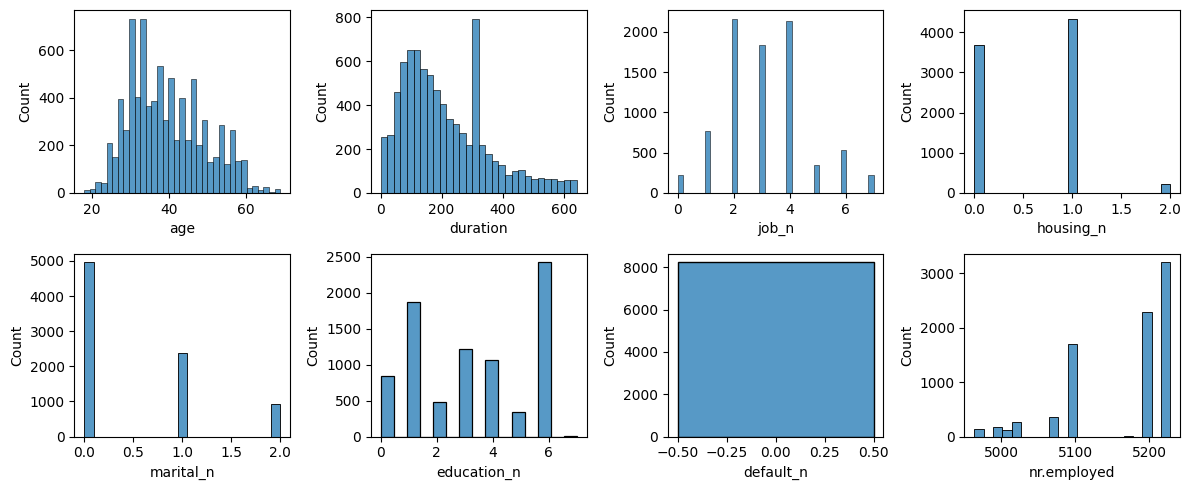

In [ ]:
fig, axis = plt.subplots(2, 4, figsize = (12, 5))

sns.histplot(ax = axis[0, 0], data = X_test, x = "age")
sns.histplot(ax = axis[0, 1], data = X_test, x = "duration")
sns.histplot(ax = axis[0, 2], data = X_test, x = "job_n")
sns.histplot(ax = axis[0, 3], data = X_test, x = "housing_n")
sns.histplot(ax = axis[1, 0], data = X_test, x = "marital_n")
sns.histplot(ax = axis[1, 1], data = X_test, x = "education_n")
sns.histplot(ax = axis[1, 2], data = X_test, x = "default_n")
sns.histplot(ax = axis[1, 3], data = X_test, x = "nr.employed")

plt.tight_layout()

plt.show()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 0.03027241, -0.63843005, -0.09171705, ..., -1.49902764,
         0.        ,  0.84334608],
       [-0.69562329,  1.35100708, -0.74877657, ..., -1.04168446,
         0.        , -0.94706411],
       [-0.79932268, -0.89792185,  0.56534247, ..., -1.04168446,
         0.        , -1.99632776],
       ...,
       [-0.48822452, -0.85467321,  1.87946151, ...,  1.2450314 ,
         0.        ,  0.84334608],
       [ 0.03027241, -0.81142458,  0.56534247, ..., -0.12699812,
         0.        ,  0.39504958],
       [-0.38452513,  1.95648794, -0.74877657, ...,  1.2450314 ,
         0.        , -0.94706411]])

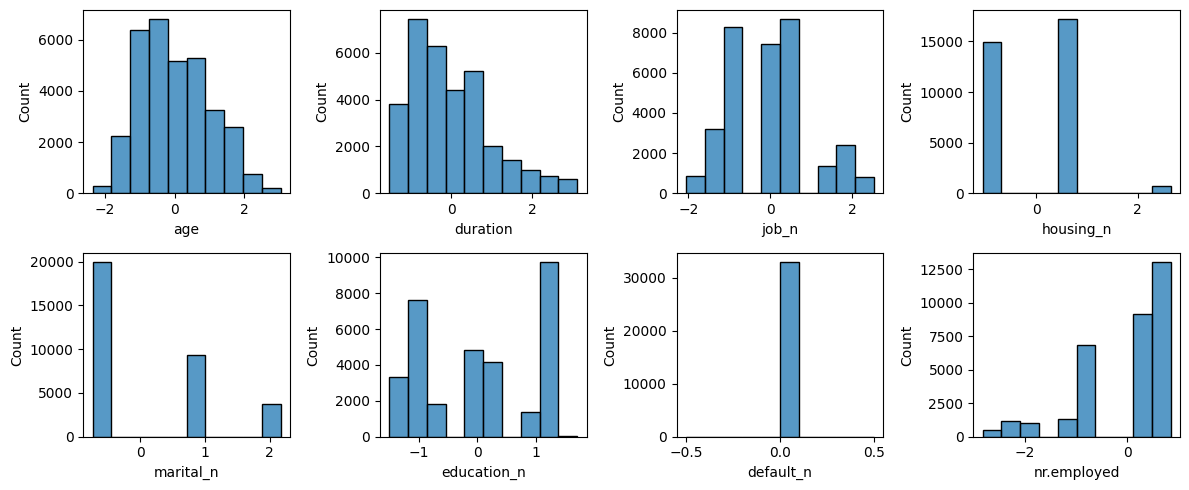

In [ ]:
# Convert scaled data back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

fig, axis = plt.subplots(2, 4, figsize = (12, 5))

sns.histplot(ax = axis[0, 0], data = X_train_scaled_df, x = "age", bins = 10)
sns.histplot(ax = axis[0, 1], data = X_train_scaled_df, x = "duration", bins = 10)
sns.histplot(ax = axis[0, 2], data = X_train_scaled_df, x = "job_n", bins = 10)
sns.histplot(ax = axis[0, 3], data = X_train_scaled_df, x = "housing_n", bins = 10)
sns.histplot(ax = axis[1, 0], data = X_train_scaled_df, x = "marital_n", bins = 10)
sns.histplot(ax = axis[1, 1], data = X_train_scaled_df, x = "education_n", bins = 10)
sns.histplot(ax = axis[1, 2], data = X_train_scaled_df, x = "default_n", bins = 10)
sns.histplot(ax = axis[1, 3], data = X_train_scaled_df, x = "nr.employed", bins = 10)

plt.tight_layout()

plt.show()

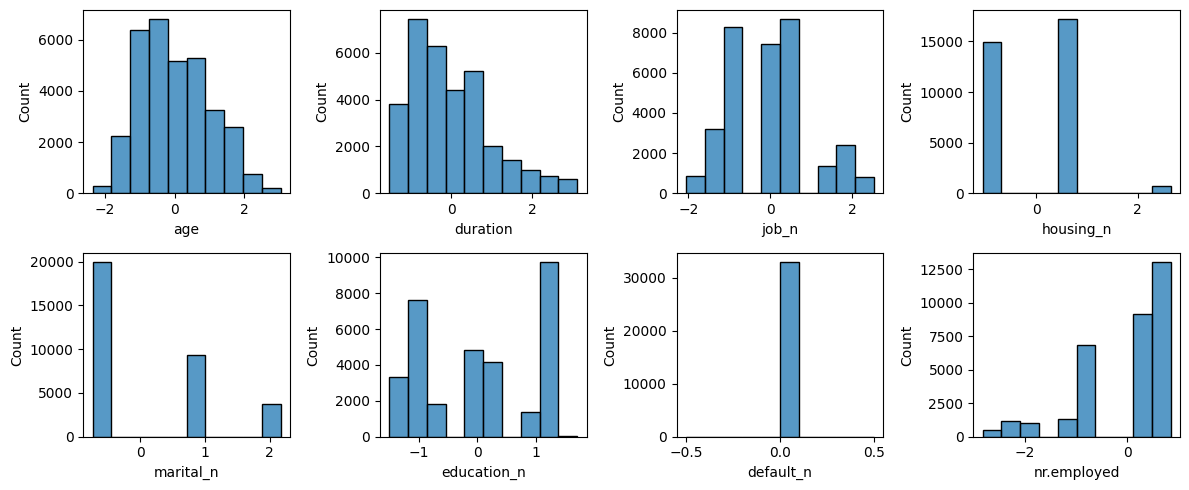

In [ ]:
X_test_scaled_df = pd.DataFrame(X_train_scaled, columns=X_test.columns)

fig, axis = plt.subplots(2, 4, figsize = (12, 5))

sns.histplot(ax = axis[0, 0], data = X_test_scaled_df, x = "age", bins = 10)
sns.histplot(ax = axis[0, 1], data = X_test_scaled_df, x = "duration", bins = 10)
sns.histplot(ax = axis[0, 2], data = X_test_scaled_df, x = "job_n", bins = 10)
sns.histplot(ax = axis[0, 3], data = X_test_scaled_df, x = "housing_n", bins = 10)
sns.histplot(ax = axis[1, 0], data = X_test_scaled_df, x = "marital_n", bins = 10)
sns.histplot(ax = axis[1, 1], data = X_test_scaled_df, x = "education_n", bins = 10)
sns.histplot(ax = axis[1, 2], data = X_test_scaled_df, x = "default_n", bins = 10)
sns.histplot(ax = axis[1, 3], data = X_test_scaled_df, x = "nr.employed", bins = 10)

plt.tight_layout()

plt.show()

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest

# k = 5 selects the 5 most relevant features for predicting `price`
selection_model = SelectKBest(f_classif, k = 5)

# Notice that we are using X_train_scaled and y_train here
selection_model.fit(X_train_scaled, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SelectKBest(k=5)

In [ ]:

ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train_scaled), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scaled), columns = X_test.columns.values[ix])

In [ ]:
X_train_sel

,duration,job_n,marital_n,education_n,nr.employed
0,-0.638430,-0.091717,-0.734900,-1.499028,0.843346
1,1.351007,-0.748777,0.716831,-1.041684,-0.947064
2,-0.897922,0.565342,-0.734900,-1.041684,-1.996328
3,-0.494268,-0.091717,-0.734900,-0.584341,-0.947064
4,-1.013252,-0.091717,0.716831,-0.126998,0.843346
...,...,...,...,...,...
32935,2.734963,1.222402,-0.734900,-1.041684,0.328430
32936,0.341872,-1.405836,-0.734900,-1.041684,-0.947064
32937,-0.854673,1.879462,-0.734900,1.245031,0.843346
32938,-0.811425,0.565342,0.716831,-0.126998,0.395050


In [ ]:
X_test_sel


,duration,job_n,marital_n,education_n,nr.employed
0,-0.169903,-1.405836,-0.734900,-1.041684,0.328430
1,-0.350106,-0.748777,-0.734900,1.245031,0.395050
2,-0.321273,-0.748777,0.716831,-1.041684,-0.947064
3,-0.854673,0.565342,0.716831,1.245031,0.395050
4,-0.191528,-0.748777,-0.734900,-1.041684,0.843346
...,...,...,...,...,...
8231,-0.032949,-1.405836,0.716831,-1.041684,0.328430
8232,-0.696095,-0.091717,-0.734900,-0.126998,0.328430
8233,-0.018533,0.565342,0.716831,1.245031,-0.947064
8234,-0.422187,-0.091717,0.716831,-0.584341,0.843346


In [ ]:
dict(zip(X_train.columns,selection_model.scores_))


{'age': 2.2406946025941767,
 'duration': 3202.915641266126,
 'job_n': 56.80591316411944,
 'housing_n': 4.045280142280121,
 'marital_n': 27.770138932869624,
 'education_n': 66.22938784488488,
 'default_n': nan,
 'nr.employed': 4733.503787795713}

Build linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Instantiate the model
model = LinearRegression()

In [ ]:
# Encode the target variable
y_train_encoded = y_train.map({'no': 0, 'yes': 1})

# Now train the model with the encoded y_train
model.fit(X_train_sel, y_train_encoded)


LinearRegression()

In [ ]:
print(y_test.dtype)
print(y_pred.dtype)


In [ ]:
y_test = y_test.replace('no', np.nan)  # Replace 'no' with NaN (Not a Number)


In [ ]:
y_test = y_test.astype(float)  # Convert to float
y_pred = y_pred.astype(float)  # Convert to float

# Now you can replace 'no' with NaN:
y_test[y_test == 'no'] = np.nan  
y_pred[y_pred == 'no'] = np.nan  


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test) 


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# ... your code

# Method 1: Boolean Indexing
y_test[y_test == 'no'] = np.nan  
y_pred[y_pred == 'no'] = np.nan  # Do the same for y_pred if needed

# Method 2: np.where
# y_test = np.where(y_test == 'no', np.nan, y_test)  
# y_pred = np.where(y_pred == 'no', np.nan, y_pred) 

if y_pred.ndim == 1:
    y_pred = y_pred.reshape(-1, 1) 

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.8970373967945605


In [ ]:
# Use the model to make predictions using the test set with the selected features
y_pred = model.predict(X_test_sel)

# Compare the model's predictions with the actual values of `y_test`
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.8970373967945605


In [ ]:
from sklearn.metrics import r2_score

# Evaluate the model using R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: -8.023132767099856
